# Check if we can get trigger codes from openBCI GUI recording

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mne 

In [102]:
from glob import glob  
data_files = glob('./OpenBCISession*/*.txt')
print(data_files)

['./OpenBCISession_2025-11-05_16-01-53/OpenBCI-RAW-2025-11-05_16-03-28.txt', './OpenBCISession_2025-11-05_15-56-43/OpenBCI-RAW-2025-11-05_15-57-44.txt']


In [103]:
# df = pd.concat([pd.read_csv(f, skiprows=4) for f in data_files], ignore_index=True)

df = pd.read_csv(data_files[0], skiprows=4, skipinitialspace=True)#.reset_index()

In [104]:
df.drop(columns=["Not Used", "Not Used.1", "Accel Channel 0", "Accel Channel 1", "Accel Channel 2", "Analog Channel 0", "Analog Channel 1", "Analog Channel 2"], inplace=True)

In [105]:
df.columns

Index(['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)',
       'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)',
       'Digital Channel 4 (D18)', 'Timestamp', 'Marker Channel',
       'Timestamp (Formatted)'],
      dtype='object')

In [106]:
sfreq = 250
ch_names = df.columns[1:].tolist()

<Axes: >

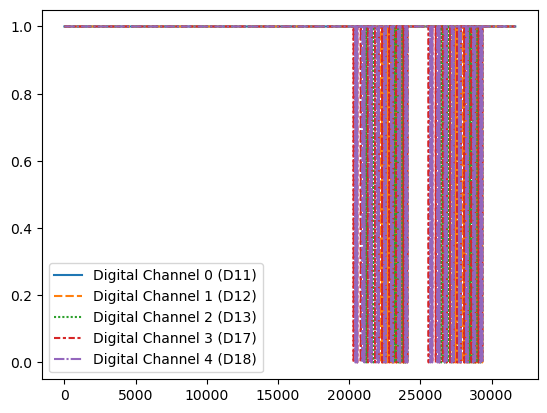

In [107]:
sns.lineplot(data=df[df.columns[9:14]])

In [ ]:
df_small = df.iloc[-sfreq * 50:] 

df_small[df_small.columns[9:14]] =  df_small[df_small.columns[9:14]].astype(bool)

chs = df_small.columns[9:14]
fig, axes = plt.subplots(len(chs), 1, figsize=(10, 2 * len(chs)), sharex=True)
for ax, col in zip(axes, chs):
    sns.lineplot(x=df_small['Sample Index'], y=df_small[col], ax=ax)
    ax.set_ylabel(col)
    ax.grid(True)
axes[-1].set_xlabel('Sample Index')
plt.tight_layout()
plt.show()

# sns.lineplot(data=df_small[df_small.columns[9:14]])

/tmp/ipykernel_179113/2295355772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small[df_small.columns[9:14]] =  df_small[df_small.columns[9:14]].astype(bool)


In [ ]:
df_small[df_small.columns[9:14]]

,Digital Channel 0 (D11),Digital Channel 1 (D12),Digital Channel 2 (D13),Digital Channel 3 (D17),Digital Channel 4 (D18)
19172,True,True,True,True,True
19173,True,True,True,True,True
19174,True,True,True,True,True
19175,True,True,True,True,True
19176,True,True,True,True,True
...,...,...,...,...,...
31667,True,True,True,True,True
31668,True,True,True,True,True
31669,True,True,True,True,True
31670,True,True,True,True,True
